# Previous 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
die_vals = np.array([1,2,3,4,5,6])
#np.random.choice(die_vals,size=20)
np.random.choice(die_vals, replace=False, size=3) #size should be less than 20

array([5, 3, 1])

In [6]:
cancer_df = pd.read_csv('../data/cancer_data_edited.csv',usecols=['id','diagnosis','radius'])
cancer_df.head()

,id,diagnosis,radius
0,842302,M,17.99
1,842517,M,20.57
2,84300903,M,19.69
3,84348301,M,11.42
4,84358402,M,20.29


In [4]:
cancer_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [117]:
cancer_df_samp = cancer_df.sample(80)

In [118]:
cancer_df.shape

(569, 3)

In [119]:
cancer_df_samp.shape

(80, 3)

In [120]:
cancer_df_samp['radius'].mean()

14.1850125

In [156]:
cancer_df_samp[(cancer_df_samp['diagnosis']=='B')].mean()
cancer_df_samp[(cancer_df_samp['diagnosis']=='B')].mean()['radius']

11.881857142857141

In [19]:
sample_df = cancer_df.sample(80)
boot_sample_df = sample_df.sample(80,replace=True)
boot_means = []
for i in range(1000):
    boot_sample_df = sample_df.sample(80,replace=True)
    boot_means.append(boot_sample_df[boot_sample_df['diagnosis']=='B'].mean()['radius'])

np.mean(boot_means) # sample mean

12.057342530700979

(array([  6.,  12.,  46., 111., 225., 234., 193., 115.,  43.,  15.]),
 array([11.26996   , 11.41258483, 11.55520967, 11.6978345 , 11.84045933,
        11.98308417, 12.125709  , 12.26833383, 12.41095867, 12.5535835 ,
        12.69620833]),
 <a list of 10 Patch objects>)

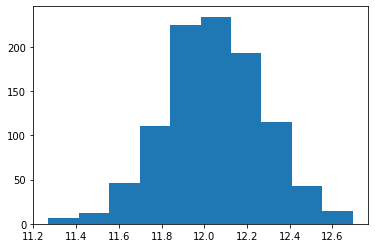

In [16]:
plt.hist(boot_means)

In [17]:
np.percentile(boot_means,2.5), np.percentile(boot_means,97.5) #confidence interval 95%

(11.586190476190474, 12.48724843937575)

In [154]:
cancer_df[cancer_df['diagnosis']=='B'].mean()['radius']
#compare with this - pop mean is in the conf interval described above

12.14652380952381

In [9]:
sample = cancer_df.sample(80,replace=True)
mean_B = sample[sample['diagnosis']=='B'].mean()['radius']
mean_M = sample[sample['diagnosis']=='M'].mean()['radius']
mean_M-mean_B

6.095981068289383

In [20]:
sample_df = cancer_df.sample(200)
boot_sample_df = sample_df.sample(200,replace=True)
boot_means = []
for i in range(1000):
    boot_sample_df = sample_df.sample(200,replace=True)
    mean_B = boot_sample_df[boot_sample_df['diagnosis']=='B'].mean()['radius']
    mean_M = boot_sample_df[boot_sample_df['diagnosis']=='M'].mean()['radius']
    boot_means.append(mean_M-mean_B)

print(np.mean(boot_means)) # sample difference mean

5.645423603772233


In [14]:
low, high = np.percentile(boot_means,2.5), np.percentile(boot_means,97.5)
print(low,',',high)

4.592699384723558 , 6.134109302044077


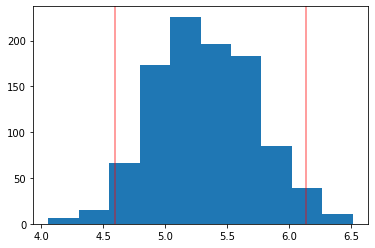

In [13]:
plt.hist(boot_means)
plt.axvline(low, color='r',alpha=0.5)
plt.axvline(high, color='r',alpha=0.5)

In [35]:
#Margin of error
np.mean(boot_means)-np.percentile(boot_means,2.5), np.percentile(boot_means,97.5)-np.mean(boot_means)

(1.2373134488424444, 1.3325871995604714)

In [33]:
# confidence interval for t-test
# compares mean
import statsmodels.stats.api as sms

X1 = cancer_df[cancer_df['diagnosis']=='B']['radius']
X2 = cancer_df[cancer_df['diagnosis']=='M']['radius']

cm = sms.CompareMeans(sms.DescrStatsW(X2), sms.DescrStatsW(X1))
print(cm.tconfint_diff(usevar='unequal'))

(4.845165154122917, 5.787447604187953)


In [16]:
cancer_df[cancer_df['diagnosis']=='B'].mean()['radius']

12.14652380952381

In [17]:
cancer_df[cancer_df['diagnosis']=='M'].mean()['radius']

17.46283018867925

In [22]:
X1
# sms.DescrStatsW(X1)

12.14652380952381

In [34]:
# Large sample => narrow interval

In [2]:
coffee_df = pd.read_csv('../data/coffee_dataset.csv')
coffee_df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [43]:
# Hypothesis Testing
# question : Is average height of all population(both coffee drinkers and non-coffee drinkers) greater than 70 inches? µ=mean height
# H0 : µ <= 70
# H1 : µ > 70

sample_df = coffee_df.sample(200)
#boot_sample_df = sample_df.sample(200,replace=True)
coffee_df_sample_means = []
for i in range(10000):
    boot_sample_df = sample_df.sample(200,replace=True)
    coffee_df_sample_means.append(boot_sample_df['height'].mean())

np.mean(coffee_df_sample_means)

67.5542931163167

In [44]:
# confidence interval = 95%
low,high = np.percentile(coffee_df_sample_means,2.5), np.percentile(coffee_df_sample_means,97.5)
print(low.round(2),',',high.round(2))

67.1 , 68.0


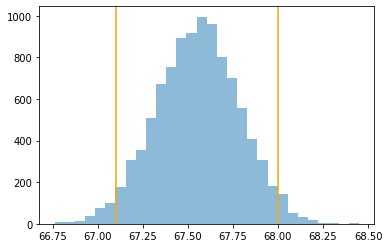

In [45]:
plt.hist(coffee_df_sample_means,bins=30,alpha=0.5)
plt.axvline(low,color='orange')
plt.axvline(high,color='orange')

In [30]:
# Using your confidence interval, you can simply look at if the interval falls in the null hypothesis space 
# or in the alternative hypothesis space to choose which hypothesis you believe to be true.
# Our case its H0<=70 as (67.36 , 68.24)<=70
# In the above case, our interval was entirely below 70, which would suggest the null (the population mean is 
#                                                                                      less than 70) is actually true.

**Is average height for coffee drinkers is the same as for non-coffee drinkers?**
**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_1: \mu_{coff} - \mu_{no} \neq 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

**Is the the average height for coffee drinkers is less than non-coffee drinkers?**

$$H_0: \mu_{coff} - \mu_{no} \geq 0$$


$$H_1: \mu_{coff} - \mu_{no} < 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

In [3]:
sample_df = coffee_df.sample(200)
height_coffee_df_sample_means = []
height_drink_df_sample_means = []
height_not_drink_df_sample_means = []
for i in range(10000):
    boot_means = sample_df.sample(200, replace=True)
    X1 = boot_means[boot_means['drinks_coffee']==True].mean()['height']
    X2 = boot_means[boot_means['drinks_coffee']==False].mean()['height']
    height_drink_df_sample_means.append(X1)
    height_not_drink_df_sample_means.append(X2)
    height_coffee_df_sample_means.append(X1-X2)

print(np.std(height_drink_df_sample_means))
print(np.std(height_not_drink_df_sample_means))
print(np.std(height_coffee_df_sample_means))

0.22492291215448157
0.39779872310472913
0.45571787624118226


In [4]:
print(np.mean(height_drink_df_sample_means))
print(np.mean(height_not_drink_df_sample_means))
print(np.mean(height_coffee_df_sample_means))

68.4446847726306
66.87560646846407
1.569078304166512


In [5]:
# confidence interval = 95%
low,high = np.percentile(height_drink_df_sample_means,2.5), np.percentile(height_drink_df_sample_means,97.5)
print(low.round(2),',',high.round(2))
# confidence interval = 95%
low,high = np.percentile(height_not_drink_df_sample_means,2.5), np.percentile(height_not_drink_df_sample_means,97.5)
print(low.round(2),',',high.round(2))
# confidence interval = 95%
low,high = np.percentile(height_coffee_df_sample_means,2.5), np.percentile(height_coffee_df_sample_means,97.5)
print(low.round(2),',',high.round(2))

68.0 , 68.89
66.1 , 67.66
0.66 , 2.44


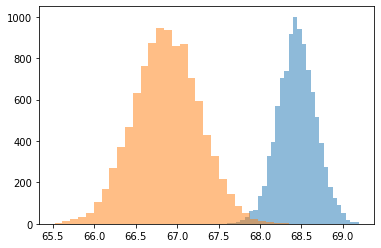

In [6]:
plt.hist(height_drink_df_sample_means,alpha=0.5,bins=30);
plt.hist(height_not_drink_df_sample_means,alpha=0.5,bins=30);

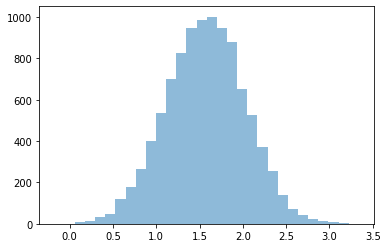

In [7]:
plt.hist(height_coffee_df_sample_means,alpha=0.5,bins=30);

use your sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect if your sampling distribution were centered on zero.  Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

**We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.**

-0.92 , 0.88


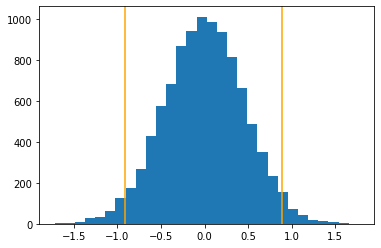

In [8]:
h0 = np.random.normal(0, np.std(height_coffee_df_sample_means), 10000) # Here are 10000 draws from the sampling distribution under the null hypo
low,high = np.percentile(h0,2.5), np.percentile(h0,97.5)
print(low.round(2),',',high.round(2))
plt.hist(h0,bins=30);
plt.axvline(low,color='orange')
plt.axvline(high,color='orange')

In [15]:
# H0 : µ <= 70
# H1 : µ > 70
sample_mean = sample_df['height'].mean()
h0 = np.random.normal(70, np.std(height_coffee_df_sample_means), 10000)
(h0>sample_mean).mean() # p-value : proprotion of the simulated draws that are larger than our sample mean
# calculated h0 values which are greater than our sample mean
# p-value is very large so we should consider h0
# we should stay at mean being less than 70

1.0

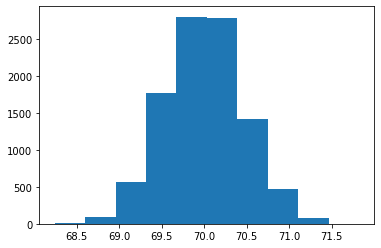

In [19]:
# sample_mean
#h0>sample_mean
#(h0>sample_mean).mean()
plt.hist(h0);

In [22]:
# H0 : µ >= 70
# H1 : µ < 70
(h0<sample_mean).mean() # is 0, so we reject h0 and consider h1 suggesting that our pop mean is less than 70

0.0

In [23]:
(h0<sample_mean).mean() + (h0>70 + (70-sample_mean)).mean()

0.0

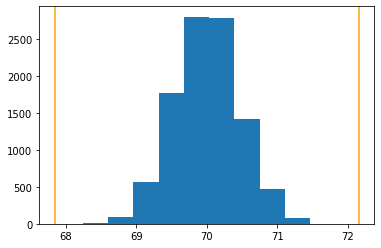

In [24]:
low = sample_mean
high = 70 + (70-sample_mean)

plt.hist(h0)
plt.axvline(low,color='orange')
plt.axvline(high,color='orange')

# New

- We can use bootstrapping and sampling distributions to build confidence intervals for our parameters of interest.

- By finding the statistic that best estimates our parameter(s) of interest (say the sample mean to estimate the 
  population mean or the difference in sample means to estimate the difference in population means), 
  we can easily build confidence intervals for the parameter of interest.

- We generally dont have all the data, so we pick a bootstrap sample and work in it and find CI(using bootstrapping)

#Confidence Interval: Where our parameters would be with some level of confidence
- Use sampling distribution to find an estimate for the mean of the population with 95% confidence
- We are 95% confident, the population mean falls between the bounds that you find

### - Confidence Interval with Bootstrapping for a single Parameter

In [3]:
coffee_df = pd.read_csv('../data/coffee_dataset.csv')
coffee_df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [4]:
# Working with a sample 
coffee_df_sample = coffee_df.sample(200)
coffee_df_sample.shape

(200, 4)

In [7]:
# Sample
coffee_df_sample['drinks_coffee'].mean() 

0.605

In [23]:
# Bootstrap Sample Means
coffee_df_sample_boot_mean = []
for i in range(1000):
    boot_sample_each = coffee_df_sample.sample(200,replace=True)
    coffee_df_sample_boot_mean.append(boot_sample_each[boot_sample_each['drinks_coffee']==True].mean()['height'])
    
# Confidence Interval
low,high = np.percentile(coffee_df_sample_boot_mean,2.5), np.percentile(coffee_df_sample_boot_mean,97.5)

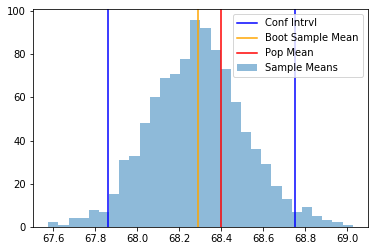

In [54]:
plt.hist(coffee_df_sample_boot_mean,alpha=0.5,bins=30, label='Sample Means')
plt.axvline(low,color='b',label='Conf Intrvl')
plt.axvline(high,color='b')
plt.axvline(np.mean(coffee_df_sample_boot_mean),color='orange',label='Boot Sample Mean')
plt.axvline(coffee_df[coffee_df['drinks_coffee']==True]['height'].mean(),color='r',label='Pop Mean')
plt.legend(loc='upper right')

In [36]:
# With 95% confidence, we can say that the mean height of coffee drinkers in the population is between
# 67.86279036669663 and 68.75302639221843
print(low,high)
print(np.mean(coffee_df_sample_boot_mean))

67.86279036669663 68.75302639221843
68.28746769447356


In [55]:
# What is the proportion of coffee drinkers in the sample? 
# What is the proportion of individuals that don't drink coffee?
print(coffee_df_sample['drinks_coffee'].mean()) 
#print(1-coffee_df_sample['drinks_coffee'].mean())

0.605


In [56]:
# Of the individuals who drink coffee, what is the average height? 
# Of the individuals who do not drink coffee, what is the average height?
print(coffee_df_sample[coffee_df_sample['drinks_coffee']==True]['height'].mean())
#print(coffee_df_sample[coffee_df_sample['drinks_coffee']==False]['height'].mean())

68.28365656624092


In [41]:
# Population paramter
coffee_df[coffee_df['drinks_coffee']==True]['height'].mean()

68.40021025548401

In [42]:
# The population mean falls between the confidence intervals found by us from the sample
# 67.86279036669663<68.40021025548401<68.75302639221843

###  - Confidence Interval with Bootstrapping for a difference of two Parameters

In [58]:
# confidence interval for the difference of the average heights for coffee drinkers and non-coffee drinkers

1.0664431352730417 2.7378423306438733
1.8955909772315986


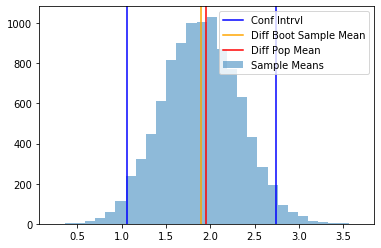

In [64]:
coffee_df_sample = coffee_df.sample(200)

coffee_df_sample_boot_mean = []
for i in range(10000):
    boot_sample_each = coffee_df_sample.sample(200,replace=True)
    mean_coff = boot_sample_each[boot_sample_each['drinks_coffee']==True].mean()['height']
    mean_non_coff = boot_sample_each[boot_sample_each['drinks_coffee']==False].mean()['height']
    coffee_df_sample_boot_mean.append((mean_coff-mean_non_coff))

# Confidence Interval
low,high = np.percentile(coffee_df_sample_boot_mean,2.5), np.percentile(coffee_df_sample_boot_mean,97.5)

diff_pop_mean_height = coffee_df[coffee_df['drinks_coffee']==True]['height'].mean() - \
                       coffee_df[coffee_df['drinks_coffee']==False]['height'].mean()

plt.hist(coffee_df_sample_boot_mean,alpha=0.5,bins=30, label='Sample Means')
plt.axvline(low,color='b',label='Conf Intrvl')
plt.axvline(high,color='b')
plt.axvline(np.mean(coffee_df_sample_boot_mean),color='orange',label='Diff Boot Sample Mean')
plt.axvline(diff_pop_mean_height,color='r',label='Diff Pop Mean')
plt.legend(loc='upper right')

print(low,high)
print(np.mean(coffee_df_sample_boot_mean))

# We can deduce with 95% confidence that the height of coffee drinkers is more that non-coffee drinkers

# To be done

1. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights 
   for those older than 21 and those younger than 21. Build a 99% confidence interval using your sampling 
   distribution. Use your interval to finish answering the first quiz question below.
2. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee 
   drinkers and the average height for non-coffee drinkers for individuals under 21 years old. Using your 
   sampling distribution, build a 95% confidence interval. Use your interval to start answering question 2 below.
3. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee 
   drinkers and the average height for non-coffee drinkers for individuals over 21 years old. Using your sampling 
   distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question 
   below. As well as the following questions.

In [67]:
# Applications : compare some parameters between two groups

# A/B testing is one of the most important to businesses around the world. In this technique, 
# you are changing something about your web layout to understand how it impacts users. 
# You ideally want to provide a page that leads to more clicks, higher revenue, and/or higher customer satisfaction.

- Using confidence intervals and hypothesis testing, you are able to provide statistical significance in making decisions. 

- However, it is also important to take into consideration practical significance in making decisions. Practical significance takes into consideration other factors of your situation that might not be considered directly in the results of your hypothesis test or confidence interval. Constraints like space, time, or money are important in business decisions. However, they might not be accounted for directly in a statistical test.

#### Bootstrap confidence Intervals we built above vs traditional hypothesis tests
- Bootstrap confidence Intervals can be used anywhere inplace of traditional hypthesis tests
- below is a comparison of the traditional method for calculating a difference of means using a python built in to     the bootstrapping method we have been using throughout this lesson.
- With large sample sizes, these end up looking very similar. With smaller sample sizes, using a traditional methods   likely has assumptions that are not true of our interval. Small sample sizes are not ideal for bootstrapping         methods though either, as they can lead to misleading results simply due to not accurately representing our entire   population well.
- Increasing our sample size will decrease the width of our confidence interval.Increasing our confidence level         (say 95% to 99%) will increase the width of our confidence interval.
- The confidence interval width as the difference between your upper and lower bounds of your confidence interval.
  The margin of error is half the confidence interval width, and the value that you add and subtract from your sample   estimate to achieve your confidence interval final results.
 
####  machine learning techniques take an individual approach towards making conclusions, as they attempt to predict an outcome for each specific data point. Alternatively, CI talks about a population and not individual observations

In [76]:
# confidence interval for t-test hypothesis

import statsmodels.stats.api as sms

X2 = coffee_df[coffee_df['drinks_coffee']==True]['height']
X1 = coffee_df[coffee_df['drinks_coffee']==False]['height']

cm = sms.CompareMeans(sms.DescrStatsW(X2), sms.DescrStatsW(X1))
print(cm.tconfint_diff(usevar='unequal')) # almost same as Bootstrap CI we coded above
# 1.0664431352730417 2.7378423306438733 using Bootstrap CI

(1.729787583879242, 2.183817402794348)


# https://stattrek.com/hypothesis-test/hypothesis-testing.aspx